In [23]:
%load_ext autoreload
%autoreload all
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

from gagliardini import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First we implement a simple herron langway model for a random site. 

I use the accumulation rate, surface density, etc. from North Central as provided by the Herron Langway 1980 paper.  

I have used the HL equations given by Arthern 2010 as it uses more convenient units than the original HL 1980 paper. 

In [26]:
rhow = 1000
rhoi = 917
R = 8.31446261815324 #J/mol/K
g = 9.82

def ArthernHL(T,rho,bdot):
    # herron langway as given in Arthern2010
    # units: celcius, kg/m3, kg/m2
    T = T + 273.15
    c0 = 11 * (bdot/rhow)*np.exp(-10160/(R*T))
    c1 = 575 * np.sqrt(bdot/rhow)*np.exp(-21400/(R*T))
    c = np.where(rho<550,c0,c1)
    drho_dt = c*(rhoi-rho)
    return drho_dt 

# As NorthCentral fig3 in HL paper
if True:
    T = -31.7
    bdot = .13 * rhow #kg/m2
    rhos = 300 
    HLsitename = 'North Central'
else: 
    T = -21.5 #south dome
    bdot = .5 * rhow #kg/m2
    rhos = 350 
    HLsitename = 'South Dome'



drho = 10
rho = np.arange(rhos,900,drho)
w = bdot/rho
drho_dt = ArthernHL(T,rho,bdot)
ezz = -drho_dt/rho

drho_dz = drho_dt/w #signs?

dz = drho/drho_dz
z = cumtrapz(dz,initial=0)


a,b = fit_density_profile(z,rho,T=T,bdot=bdot)
HL = {'z': z, 'rho': rho, 'a': a, 'b': b}

e1,e2 = 0.00, 0.00
sec_per_year=365.25*24*60*60

In [20]:
egripsmooth = np.loadtxt('egrip/sune/egrip_density_iceeqdepth.txt',comments='%')
ix =egripsmooth[:,0]<100
z = egripsmooth[ix,0]
rho = egripsmooth[ix,1]
a,b = fit_density_profile(z.ravel(),rho.ravel(),T=-31,bdot=.11*rhoi,e1=e1,e2=e2)
EGsmooth = {'z': z, 'rho': rho, 'a': a, 'b': b}



(60, 60)

Text(0.5, 0, 'depth (m)')

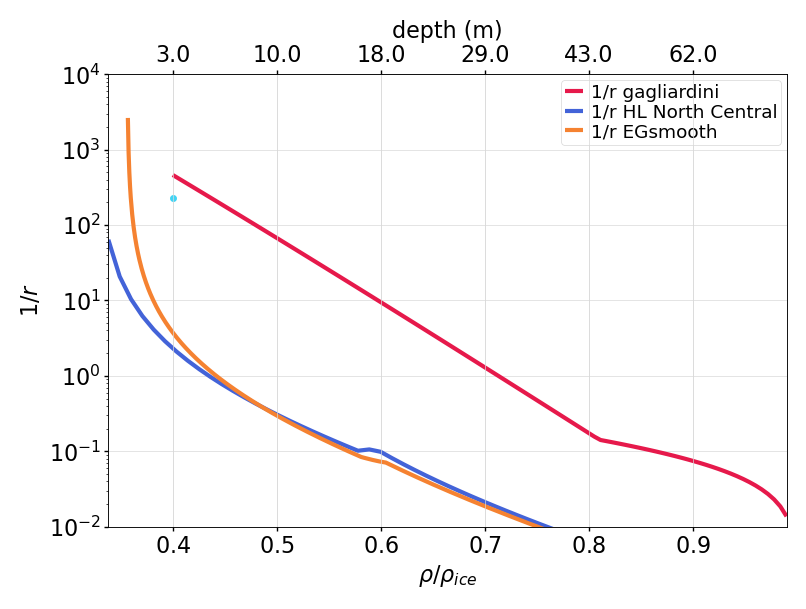

In [21]:
r = np.linspace(.4*rhoi,.99*rhoi,100)

plt.style.use('aslak')
plt.semilogy(r/rhoi,1/r_fun(a_fun(r),b_fun(r)),label='1/r gagliardini')
plt.semilogy(HL['rho']/rhoi,1/r_fun(HL['a'],HL['b']),label=f'1/r HL {HLsitename}')
plt.semilogy(EGsmooth['rho']/rhoi,1/r_fun(EGsmooth['a'],EGsmooth['b']),label='1/r EGsmooth')

plt.plot(0.4,1/r_fun(500,500),'.')

#plt.grid()
plt.legend()
plt.xlabel('$\\rho/\\rho_{ice}$')
plt.ylabel('$1/r$');
plt.ylim([1e-2,1e4])

ax1=plt.gca()
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
xticks=np.arange(0.4,0.99,0.1)
ax2.set_xticks(xticks)
ax2.set_xticklabels(np.round(np.interp(xticks*rhoi,EGsmooth['rho'],EGsmooth['z'])))
ax2.set_xlabel(r"depth (m)")


    